In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from random import random, randint

In [2]:
def init_states(size):
    k = 0
    states = np.zeros((size[0], size[1]))
    for i in range(size[0]):
        for j in range(size[1]):
            states[i, j] = k
            k += 1
    return states    

In [3]:
init_states((7,10))

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14., 15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24., 25., 26., 27., 28., 29.],
       [30., 31., 32., 33., 34., 35., 36., 37., 38., 39.],
       [40., 41., 42., 43., 44., 45., 46., 47., 48., 49.],
       [50., 51., 52., 53., 54., 55., 56., 57., 58., 59.],
       [60., 61., 62., 63., 64., 65., 66., 67., 68., 69.]])

In [4]:
def current_world(current_state):
    states = init_states((7,10))
    mat = init_states((7,10))*0
    starting_state = 30
    goal_state = 47
    cliff_states = [24, 25, 54, 55]
    
    for i in cliff_states:
        row = np.where(states==i)[0][0]
        col = np.where(states==i)[1][0]
        mat[row, col] = -1
   
    row = np.where(states==goal_state)[0][0]
    col = np.where(states==goal_state)[1][0]
    mat[row, col] = +4
    
    row = np.where(states==current_state)[0][0]
    col = np.where(states==current_state)[1][0]
    mat[row, col] = +1    
    
    return mat

In [5]:
def move(current_state, action):
    
    wind_strength = 0.01 # The number should between 0.0 to 1.0. Higher number means more wind. 
    
    #stochastic action (due to wind)
    if random() < wind_strength:
        action = action-1
        if action == -1:
            action = 3
    if random() > 1.0-wind_strength:
        action = action+1
        if action == 4:
            action = 0
        
    
    states = init_states((7,10))
    goal_state = 47
    row = np.where(states==current_state)[0][0]
    col = np.where(states==current_state)[1][0]
    if action == 0:
        if row > 0:
            next_state = states[row-1, col]
            #print('UP')
        else:
            next_state = current_state
    if action == 2:
        if row < 6:
            next_state = states[row+1, col]
            #print('DOWN')
        else:
            next_state = current_state
    if action == 1:
        if col < 9:
            next_state = states[row, col+1]
            #print('RIGHT')
        else:
            next_state = current_state
    if action == 3:
        if col > 0:
            next_state = states[row, col-1]
            #print('LEFT')
        else:
            next_state = current_state
    
    if next_state == goal_state:
        reward = 1
        proceed = False
    elif (next_state==24) or (next_state==25) or (next_state==54) or (next_state==55):
        reward = -1
        proceed = False        
    else:
        reward = 0
        proceed = True
    
    return next_state, reward, proceed

In [6]:
def init_q_s_a(no_states, no_actions):
    q_s_a = np.zeros((no_states*no_actions, 3))
    k = 0
    for state in range(no_states):
        for action in range(no_actions):
            q_s_a[k, :] = [state, action, random()]
            #q_s_a[k, :] = [state, action, 0]
            k += 1
    return q_s_a

<IPython.core.display.Javascript object>


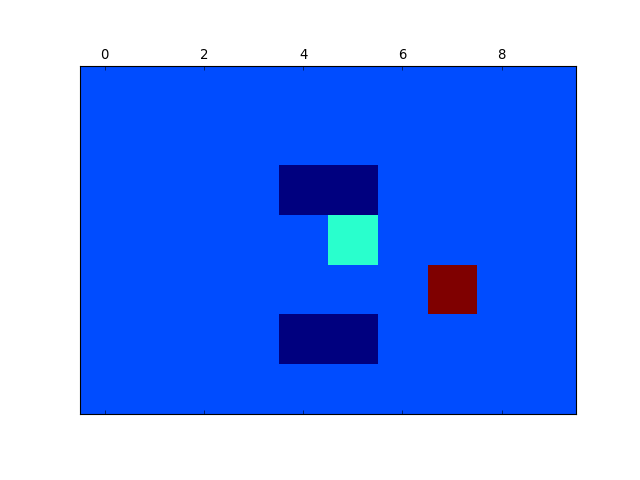

KeyboardInterrupt: 

In [7]:
no_episodes = 50000
starting_state = 30
starting_epsilon = 0.5
decay_epsilon = 1.001
alpha = 0.5
gamma = 0.9

size = (7, 10)
no_states = size[0]*size[1]
no_actions = 4
q_s_a = init_q_s_a(no_states, no_actions)

finish_line = np.zeros(no_episodes)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()



for episode in range(no_episodes):
    #print(episode)
    proceed = True
    current_state = starting_state
    epsilon = starting_epsilon/(decay_epsilon**episode)
    move_number = 0
    while proceed:
        if episode%50==0:
            ax.clear()
            ax.matshow(current_world(current_state))
            plt.title('epidose:'+str(episode)+'  |  time step:'+str(move_number))
            fig.canvas.draw()
        
        if random()<epsilon:
            current_action = randint(0,3)
            move_type = 'X' #X stands for Exploration
        else:
            temp = q_s_a[q_s_a[:,0]==current_state, :]
            index = np.argmax(temp[:, 2])
            current_action = temp[index, 1]
            move_type = 'G' #G stands for Greedy
           
        next_state, reward, proceed = move(current_state, current_action)
        #print(int(episode), int(current_state), int(current_action), move_type, int(reward), int(next_state))
        
        current_q = q_s_a[(q_s_a[:,0]==current_state) & (q_s_a[:,1]==current_action), 2]

        temp = q_s_a[q_s_a[:,0]==next_state, :]
        next_q = np.max(temp[:, 2])
        
        q_s_a[(q_s_a[:,0]==current_state) & (q_s_a[:,1]==current_action), 2] = current_q + alpha*(reward+gamma*next_q-current_q)
        
        current_state = next_state
        move_number += 1
    finish_line[episode] = move_number